In [ ]:
!python -m pip install git+https://github.com/carnotresearch/cr-vision.git


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
!cp /content/drive/MyDrive/work/cr-vision/experiments/cs/sda/sda.py .

In [5]:
import sda

In [6]:
!cp  /content/drive/MyDrive/datasets/birds/CUB_200_2011_TEST.zip .

In [7]:
!unzip CUB_200_2011_TEST.zip

Archive:  CUB_200_2011_TEST.zip
   creating: CUB_200_2011_TEST/
  inflating: CUB_200_2011_TEST/Black_Footed_Albatross_0082_796121.jpg  
  inflating: CUB_200_2011_TEST/Black_Throated_Blue_Warbler_0133_161539.jpg  
  inflating: CUB_200_2011_TEST/Downy_Woodpecker_0124_184364.jpg  
  inflating: CUB_200_2011_TEST/Fish_Crow_0058_25999.jpg  
 extracting: CUB_200_2011_TEST/Indigo_Bunting_0005_13832.jpg  
 extracting: CUB_200_2011_TEST/Loggerhead_Shrike_0118_105157.jpg  
  inflating: CUB_200_2011_TEST/Red_Faced_Cormorant_0048_796296.jpg  
  inflating: CUB_200_2011_TEST/Rhinoceros_Auklet_0042_2101.jpg  
  inflating: CUB_200_2011_TEST/Vesper_Sparrow_0081_125541.jpg  
  inflating: CUB_200_2011_TEST/White_Breasted_Kingfisher_0022_73459.jpg  
  inflating: CUB_200_2011_TEST/White_Pelican_0009_97340.jpg  
  inflating: CUB_200_2011_TEST/Yellow_Billed_Cuckoo_0006_26578.jpg  


In [8]:
rootdir = 'CUB_200_2011_TEST'

In [9]:
from cr.vision.io import read_images, ImagesFromDir

In [10]:
ds = ImagesFromDir(rootdir, size=12)

In [31]:
paths = ds.all_paths

In [35]:
paths = sorted(paths)

In [36]:
names = [path.name for path in paths]

In [37]:
images = read_images(paths, 256, 256)

In [38]:
images = images / 255

In [39]:
images.shape

(12, 256, 256, 3)

In [40]:
model = sda.load_saved_model()
model.summary()

Loading the saved model from /content/drive/MyDrive/work/cr-vision/experiments/cs/sda/saved_model
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 256, 256, 3)]     0         
_________________________________________________________________
sensor (Conv2D)              (None, 16, 16, 192)       147456    
_________________________________________________________________
layer-1 (Conv2D)             (None, 16, 16, 768)       148224    
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 16, 16, 768)       3072      
_________________________________________________________________
layer-2 (Conv2D)             (None, 16, 16, 192)       147648    
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 16, 16, 192)       768       
_____________________________

In [41]:
reconstructions = model.predict(images)


In [42]:
from skimage.metrics import peak_signal_noise_ratio


In [43]:
n = images.shape[0]

for i in range(n):
    name = names[i]
    src = images[i]
    dst = reconstructions[i]
    psnr = peak_signal_noise_ratio(src, dst)
    print(f"[{i+1}] PSNR : {psnr:.2f} dB, Image={name} ")


[1] PSNR : 31.66 dB, Image=Black_Footed_Albatross_0082_796121.jpg 
[2] PSNR : 28.99 dB, Image=Black_Throated_Blue_Warbler_0133_161539.jpg 
[3] PSNR : 27.87 dB, Image=Downy_Woodpecker_0124_184364.jpg 
[4] PSNR : 25.18 dB, Image=Fish_Crow_0058_25999.jpg 
[5] PSNR : 25.54 dB, Image=Indigo_Bunting_0005_13832.jpg 
[6] PSNR : 28.62 dB, Image=Loggerhead_Shrike_0118_105157.jpg 
[7] PSNR : 31.12 dB, Image=Red_Faced_Cormorant_0048_796296.jpg 
[8] PSNR : 24.41 dB, Image=Rhinoceros_Auklet_0042_2101.jpg 
[9] PSNR : 31.53 dB, Image=Vesper_Sparrow_0081_125541.jpg 
[10] PSNR : 25.03 dB, Image=White_Breasted_Kingfisher_0022_73459.jpg 
[11] PSNR : 25.89 dB, Image=White_Pelican_0009_97340.jpg 
[12] PSNR : 25.42 dB, Image=Yellow_Billed_Cuckoo_0006_26578.jpg 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  import sys


In [44]:
n = images.shape[0]

for i in range(n):
    name = names[i]
    name = name[:-4]
    parts = name.split('_')
    parts = [part for part in parts if not part.isdigit()]
    name = (" ").join(parts)
    src = images[i]
    dst = reconstructions[i]
    psnr = peak_signal_noise_ratio(src, dst)
    print(f"  * - {name}")
    print(f"    - {psnr:0.2f}")

  * - Black Footed Albatross
    - 31.66
  * - Black Throated Blue Warbler
    - 28.99
  * - Downy Woodpecker
    - 27.87
  * - Fish Crow
    - 25.18
  * - Indigo Bunting
    - 25.54
  * - Loggerhead Shrike
    - 28.62
  * - Red Faced Cormorant
    - 31.12
  * - Rhinoceros Auklet
    - 24.41
  * - Vesper Sparrow
    - 31.53
  * - White Breasted Kingfisher
    - 25.03
  * - White Pelican
    - 25.89
  * - Yellow Billed Cuckoo
    - 25.42


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  # This is added back by InteractiveShellApp.init_path()


In [45]:
from cr.vision.plots import plot_images_with_reconstructions


In [46]:
num_images_to_plot = 12

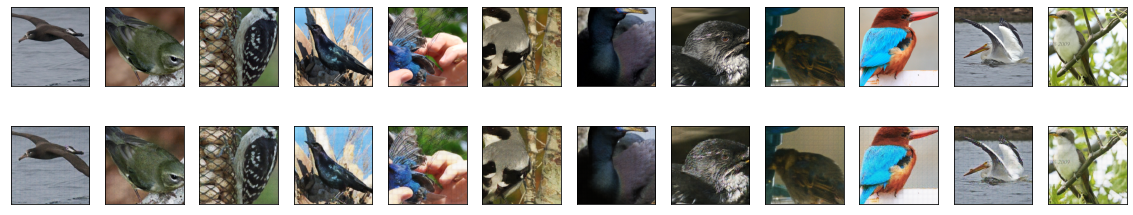

In [47]:
plot_images_with_reconstructions(images[:num_images_to_plot], reconstructions[:num_images_to_plot])
